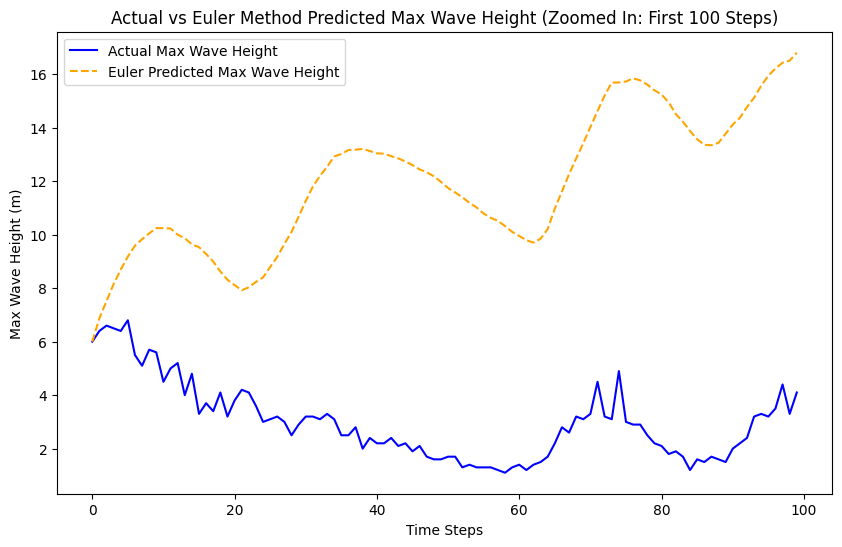

Mean Squared Error (MSE) using Euler Method (First 100 Steps): 90.9391


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 데이터 로드
file_path = '/content/OBS_BUOY_TIM_20241214230227.csv'
data = pd.read_csv(file_path, encoding='cp949')

# 필요한 열 선택
data = data[['풍속(m/s)', '최대파고(m)']]  # 풍속과 최대파고만 사용
data = data.dropna().reset_index(drop=True)

# Euler Method 파라미터 설정
dt = 1  # 시간 간격 (1시간 단위)
alpha = 0.1  # 풍속에 대한 계수
beta = 0.05  # 파고 감쇠 계수

# 초기 조건
U = data['풍속(m/s)'].values
h_actual = data['최대파고(m)'].values
h_euler = np.zeros(len(U))  # Euler Method 예측 결과 저장
h_euler[0] = h_actual[0]  # 초기 최대파고 설정

# Euler Method로 파고 예측
for t in range(1, len(U)):
    dh_dt = alpha * U[t] - beta * h_euler[t-1]  # 변화율 계산
    h_euler[t] = h_euler[t-1] + dt * dh_dt  # Euler 방법 적용

# 결과 시각화 (첫 100개 시간 단계)
plt.figure(figsize=(10, 6))
plt.plot(h_actual[:100], label='Actual Max Wave Height', color='blue')
plt.plot(h_euler[:100], label='Euler Predicted Max Wave Height', color='orange', linestyle='--')
plt.title('Actual vs Euler Method Predicted Max Wave Height (Zoomed In: First 100 Steps)')
plt.xlabel('Time Steps')
plt.ylabel('Max Wave Height (m)')
plt.legend()
plt.show()

# MSE 계산
mse = mean_squared_error(h_actual[:100], h_euler[:100])
print(f"Mean Squared Error (MSE) using Euler Method (First 100 Steps): {mse:.4f}")


Best Alpha: 0.064, Best Beta: 0.228, Best MSE: 0.6583
Final MSE with Optimized Parameters: 0.6583


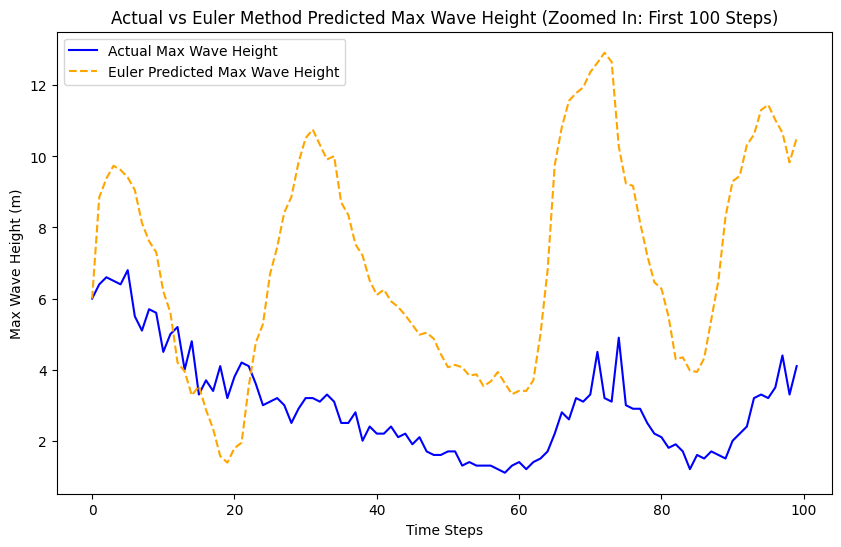

In [2]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
file_path = '/content/OBS_BUOY_TIM_20241214230227.csv'
data = pd.read_csv(file_path, encoding='cp949')

# 필요한 열 선택
data = data[['풍속(m/s)', '최대파고(m)']]  # 풍속과 최대파고만 사용
data = data.dropna().reset_index(drop=True)

# Grid Search 파라미터 범위 설정
alpha_values = np.linspace(0.01, 0.5, 10)  # 풍속 계수 범위
beta_values = np.linspace(0.01, 0.5, 10)   # 감쇠 계수 범위
dt = 1  # 시간 간격 (1시간 단위)
U = data['풍속(m/s)'].values
h_actual = data['최대파고(m)'].values

# 최적의 파라미터 찾기
best_alpha = None
best_beta = None
best_mse = float('inf')

for alpha in alpha_values:
    for beta in beta_values:
        h_euler = np.zeros(len(U))
        h_euler[0] = h_actual[0]
        for t in range(1, len(U)):
            dh_dt = alpha * U[t] - beta * h_euler[t-1]
            h_euler[t] = h_euler[t-1] + dt * dh_dt
        mse = mean_squared_error(h_actual, h_euler)
        if mse < best_mse:
            best_mse = mse
            best_alpha = alpha
            best_beta = beta

# 최적 파라미터 출력
print(f"Best Alpha: {best_alpha:.3f}, Best Beta: {best_beta:.3f}, Best MSE: {best_mse:.4f}")

# 최적 파라미터로 결과 재계산
h_euler_opt = np.zeros(len(U))
h_euler_opt[0] = h_actual[0]
for t in range(1, len(U)):
    dh_dt = best_alpha * U[t] - best_beta * h_euler_opt[t-1]
    h_euler_opt[t] = h_euler_opt[t-1] + dt * dh_dt



# 최적화된 결과 MSE 확인
final_mse = mean_squared_error(h_actual, h_euler_opt)
print(f"Final MSE with Optimized Parameters: {final_mse:.4f}")

# 결과 시각화 (첫 100개 시간 단계)
plt.figure(figsize=(10, 6))
plt.plot(h_actual[:100], label='Actual Max Wave Height', color='blue')
plt.plot(h_euler[:100], label='Euler Predicted Max Wave Height', color='orange', linestyle='--')
plt.title('Actual vs Euler Method Predicted Max Wave Height (Zoomed In: First 100 Steps)')
plt.xlabel('Time Steps')
plt.ylabel('Max Wave Height (m)')
plt.legend()
plt.show()
